#                                Pre-processing and Data Analyses                                         #


After the study of the variables that comprised the original dataset, some variables of interest were selected to compose this investigation. They are: 

- churn: Instance of churn between 31-60 days after observation date
- rev_Mean: Mean monthly revenue (charge amount)
- mou_Mean: Mean number of monthly minutes of use
- totmrc_Mean: Mean total monthly recurring charge
- ovrmou_Mean: Mean overage minutes of use
- ovrrev_Mean: Mean overage revenue
- roam_Mean: Mean number of roaming calls
- change_mou: Percentage change in monthly minutes of use vs previous three month average
- change_rev: Percentage change in monthly revenue vs previous three month average
- custcare_Mean: Mean number of customer care calls
- ccrndmou_Mean: Mean rounded minutes of use of customer care calls
- attempt_Mean: Mean number of attempted calls
- complete_Mean: Mean number of completed calls
- months: Total number of months in service
- actvsubs: Number of active subscribers in household
- asl_flag: Account spending limit
- totcalls: Total number of calls over the life of the customer
- totmou: Total minutes of use over the life of the customer
- totrev: Total revenue
- adjrev: Billing adjusted total revenue over the life of the customer
- adjmou: Billing adjusted total minutes of use over the life of the customer
- adjqty: Billing adjusted total number of calls over the life of the customer
- avgrev: Average monthly revenue over the life of the customer
- avgmou: Average monthly minutes of use over the life of the customer
- avgqty: Average monthly number of calls over the life of the customer
- avg3mou: Average monthly minutes of use over the previous three months
- avg3qty: Average monthly number of calls over the previous three months
- avg3rev: Average monthly revenue over the previous three months
- avg6mou: Average monthly minutes of use over the previous six months
- avg6qty: Average monthly number of calls over the previous six months
- avg6rev: Average monthly revenue over the previous six months
- area: Geographic area
- adults: Number of adults in household
- eqpdays: Number of days (age) of current equipment

## Pre-processing

#### * Import the requested libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### * Load the file

In [64]:
arquivo = 'churn_challenge_data2.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)

#### * Exploratory view

In [3]:
dataset.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,61,219.25,0.00,0.0,23.9975,0.0,1652,4228.00000,22.500,1504.62
1,0,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,56,482.75,22.75,9.1,57.4925,0.0,14654,26400.00000,37.425,2851.68
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,58,10.25,0.00,0.0,16.9900,0.0,7903,24385.05333,16.990,2155.91
3,0,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,60,7.50,0.00,0.0,38.0000,0.0,1502,3065.00000,38.000,2000.90
4,0,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,57,570.50,0.00,0.0,55.2300,0.0,4485,14028.00000,71.980,2181.12


#### * Verify the kinds of data in the dataset

In [4]:
dataset.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   churn          100000 non-null  int64  
 1   actvsubs       100000 non-null  int64  
 2   adjmou         100000 non-null  float64
 3   adjqty         100000 non-null  int64  
 4   adjrev         100000 non-null  float64
 5   adults         76981 non-null   float64
 6   area           99960 non-null   object 
 7   asl_flag       100000 non-null  object 
 8   attempt_Mean   100000 non-null  float64
 9   avg3mou        100000 non-null  int64  
 10  avg3qty        100000 non-null  int64  
 11  avg3rev        100000 non-null  int64  
 12  avg6mou        97161 non-null   float64
 13  avg6qty        97161 non-null   float64
 14  avg6rev        97161 non-null   float64
 15  avgmou         100000 non-null  float64
 16  avgqty         100000 non-null  float64
 17  avgrev         100000 non-null

#### * Data Cleaning
    * Verify columns with null values - The dataset will be processed according to the hypothesis to be tested

In [5]:
dataset.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23019
area                40
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2839
avg6qty           2839
avg6rev           2839
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

         * Verify the presence of duplicates
         * Delete duplicates - take out the hash in case of the verifying is 'true'

In [6]:
print(any(dataset.duplicated()))
# dataset = dataset.drop_duplicates()

False


     * Delete rows with null values

In [65]:
dataset1 = dataset.dropna(axis=0, how='all')
dataset1.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23019
area                40
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2839
avg6qty           2839
avg6rev           2839
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

#### * Save the general dataframe

In [7]:
dataset1.to_csv('dataset1.csv', index = False);

### Exploratory analyses

#### 1) Different coverage areas present distinct churn rate

Consumer behavior may be different in different regions. Thus, a more local analysis might be more effective in discovering insights that can shed light on the reasons for which a user does not want the company services. The objective of the following logic is to verify if the frequency of churns is homogeneous among the regions served by the company.

#### * Delete null values - take the hash out in case there are null values in the columns of interest

In [66]:
dataset2 = dataset1.dropna(subset=['area'], axis=0, how='any')
dataset2.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23011
area                 0
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2837
avg6qty           2837
avg6rev           2837
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

#### * Group areas by region

In [67]:
region = []
for row in dataset2['area']:
        if row in ['ATLANTIC SOUTH AREA', 'CENTRAL/SOUTH TEXAS AREA', 'DALLAS AREA', 'DC/MARYLAND/VIRGINIA AREA', 
                   'HOUSTON AREA', 'NORTH FLORIDA AREA', 'PHILADELPHIA AREA', 'SOUTH FLORIDA AREA', 'SOUTHWEST AREA', 
                   'TENNESSEE AREA'] :    region.append('South')
        elif row in ['CALIFORNIA NORTH AREA','NORTHWEST/ROCKY MOUNTAIN AREA', 'LOS ANGELES AREA']:   region.append('West')
        elif row in ['CHICAGO AREA', 'GREAT LAKES AREA', 'MIDWEST AREA', 'OHIO AREA']:  region.append('Midwest')
        elif row in ['NEW ENGLAND AREA', 'NEW YORK CITY AREA']:  region.append('Northeast')
        
        else:           region.append('None')

dataset2['region'] = region;

C:\Users\warri\AppData\Local\Temp/ipykernel_10072/2205059235.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['region'] = region;


In [10]:
dataset2.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev,region
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,219.25,0.00,0.0,23.9975,0.0,1652,4228.00000,22.500,1504.62,West
1,0,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,482.75,22.75,9.1,57.4925,0.0,14654,26400.00000,37.425,2851.68,Midwest
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,10.25,0.00,0.0,16.9900,0.0,7903,24385.05333,16.990,2155.91,Midwest
3,0,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,7.50,0.00,0.0,38.0000,0.0,1502,3065.00000,38.000,2000.90,Midwest
4,0,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,570.50,0.00,0.0,55.2300,0.0,4485,14028.00000,71.980,2181.12,Northeast


#### * Save the dataset with the region column

In [11]:
dataset2.to_csv('dataset2.csv', index = False);

#### * Create a crosstab

In [68]:
dataset3 = pd.crosstab(dataset2["region"],dataset2["churn"],margins=False)
dataset3

churn,0,1
region,,
Midwest,10918,9798
Northeast,8177,8373
South,23302,22515
West,8027,8850


#### * Save the churn dataframe by region

In [31]:
dataset3.to_csv('churn_by_region.csv', index = False);

#### * Bar plot showing the number of clients and ex-clients by region

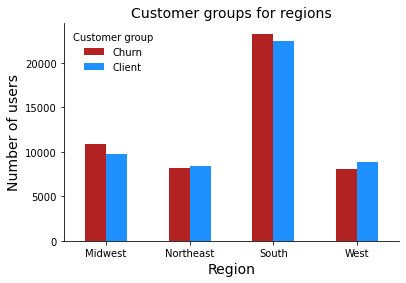

In [69]:
ax = dataset3.plot(kind='bar',
                   stacked=False,
                   color=['firebrick','dodgerblue'],
                   rot=0)
ax.set_title('Customer groups for regions',
                fontsize=14)
plt.legend(labels=["Churn","Client"],
           loc = 'upper left',
           title='Customer group',
           frameon=False)
plt.xlabel("Region",
           fontsize=14)
plt.ylabel("Number of users",
           fontsize=14)
sns.despine()

plt.savefig("churn_by_region.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 1* --> By the table and the graph, we can infer that the distribution between clients and ex-clients is similar inside regions. Apperently, regional factors are not responsible for the churns. This graph also illustrates that most of the users are located in the South region. So, whatever is the churn reason, South region would be a good choice to implement the first actions.  

#### 2) After how much time does a client have a higher probability to churn?

Knowing the time that a customer tend to cancel the account might be important. Once with this information, it is possible to track what would be the reasons for such decisions and also prevent the churn to happen. 

#### * Delete null values - take the hash out in case there are null values in the columns of interest
    * Pay attention to the dataset numbers if you take the hashes out

In [70]:
#dataset2 = dataset1.dropna(subset=['months'], axis=0, how='any')
dataset1.isnull().sum()

churn                0
actvsubs             0
adjmou               0
adjqty               0
adjrev               0
adults           23019
area                40
asl_flag             0
attempt_Mean         0
avg3mou              0
avg3qty              0
avg3rev              0
avg6mou           2839
avg6qty           2839
avg6rev           2839
avgmou               0
avgqty               0
avgrev               0
ccrndmou_Mean        0
change_mou         891
change_rev         891
complete_Mean        0
custcare_Mean        0
eqpdays              1
months               0
mou_Mean           357
ovrmou_Mean        357
ovrrev_Mean        357
rev_Mean           357
roam_Mean          357
totcalls             0
totmou               0
totmrc_Mean        357
totrev               0
dtype: int64

#### * Filter the dataset

In [71]:
dataset3 = dataset1.loc[dataset1['churn'] == 0]
dataset3.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
1,0,1,26367.0,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,...,56,482.75,22.75,9.1,57.4925,0.0,14654,26400.0,37.425,2851.68
3,0,1,3035.0,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,...,60,7.50,0.00,0.0,38.0000,0.0,1502,3065.0,38.000,2000.90
4,0,1,13965.0,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,...,57,570.50,0.00,0.0,55.2300,0.0,4485,14028.0,71.980,2181.12
5,0,2,40295.0,26362,3932.90,1.0,GREAT LAKES AREA,N,702.000000,1260,...,59,1312.25,0.00,0.0,82.2750,0.0,26812,40869.0,75.000,4033.98
7,0,1,12439.0,4470,1423.06,2.0,DALLAS AREA,N,97.000000,633,...,53,682.50,0.00,0.0,38.0525,0.0,4491,12492.0,52.490,1427.71


In [72]:
dataset4 = dataset1.loc[dataset1['churn'] == 1]
dataset4.head()

,churn,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,...,months,mou_Mean,ovrmou_Mean,ovrrev_Mean,rev_Mean,roam_Mean,totcalls,totmou,totmrc_Mean,totrev
0,1,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,...,61,219.25,0.00,0.00,23.9975,0.0,1652,4228.00000,22.50,1504.62
2,1,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,...,58,10.25,0.00,0.00,16.9900,0.0,7903,24385.05333,16.99,2155.91
6,1,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,...,53,0.00,0.00,0.00,17.1450,0.0,6279,17390.03333,16.99,3091.70
20,1,1,78927.02,28359,6472.05,2.0,TENNESSEE AREA,N,760.333333,2314,...,58,1978.00,362.25,72.45,172.4400,0.0,28477,79406.01667,99.99,6751.70
21,1,1,117230.04,78664,5935.58,3.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,47.333333,1803,...,54,1424.50,0.00,0.00,60.1850,0.0,79038,117808.04000,56.25,6005.39


#### * Histograms showing the occurrence of churns and customer maintenance through time

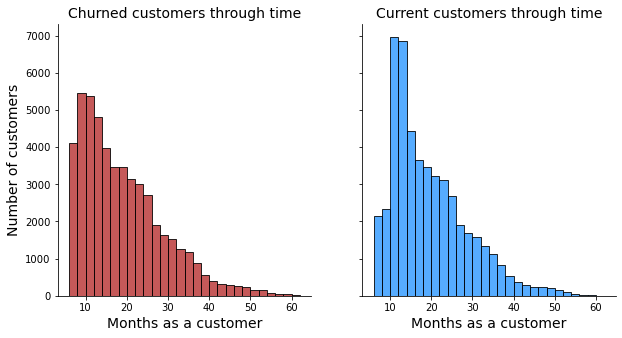

In [73]:
fig, ax = plt.subplots(1,2,
                      sharey=True,
                      figsize=(10,5))
ax[0].set_title('Churned customers through time',
                fontsize=14)
ax[1].set_title('Current customers through time',
                fontsize=14)
ax[0].set_xlabel('Months as a customer',
                 fontsize=14)
ax[1].set_xlabel('Months as a customer',
                 fontsize=14)
ax[0].set_ylabel('Number of customers',
                 fontsize=14)

sns.histplot(data=dataset3,
             x = 'months',
             binwidth = 2,
             color = 'firebrick',
             ax=ax[0])
sns.despine()


sns.histplot(data=dataset4,
             x = 'months',
             binwidth = 2,
             color = 'dodgerblue',
             ax=ax[1])
sns.despine()

plt.savefig("churn_through_time.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

#### * Calculate the churn rate
    * Create a crosstab and manipulate the table for plotting

In [74]:
dataset5 = pd.crosstab(dataset1["months"],dataset1["churn"],margins=True, normalize = 'index')
dataset5

churn,0,1
months,,
6,0.616216,0.383784
7,0.667403,0.332597
8,0.690451,0.309549
9,0.712002,0.287998
10,0.597264,0.402736
11,0.348736,0.651264
12,0.381402,0.618598
13,0.445585,0.554415
14,0.469684,0.530316


In [75]:
dataset5 = dataset5[:-1]
dataset5

churn,0,1
months,,
6,0.616216,0.383784
7,0.667403,0.332597
8,0.690451,0.309549
9,0.712002,0.287998
10,0.597264,0.402736
11,0.348736,0.651264
12,0.381402,0.618598
13,0.445585,0.554415
14,0.469684,0.530316


In [76]:
dataset5.to_csv('churn_through_time.csv', index = True);

In [77]:
arquivo = 'churn_through_time.csv'
dataset5 = pd.read_csv(arquivo, sep=',' ,header=0)
dataset5

,months,0,1
0,6,0.616216,0.383784
1,7,0.667403,0.332597
2,8,0.690451,0.309549
3,9,0.712002,0.287998
4,10,0.597264,0.402736
5,11,0.348736,0.651264
6,12,0.381402,0.618598
7,13,0.445585,0.554415
8,14,0.469684,0.530316
9,15,0.476402,0.523598


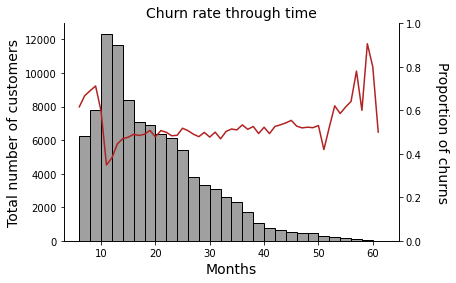

In [78]:
fig,ax = plt.subplots()

sns.histplot(data=dataset1,
             x = 'months',
             binwidth = 2,
             color = 'gray')
ax.set_title('Churn rate through time',
                fontsize=14)
ax.set_xlabel('Months',
                 fontsize=14)
ax.set_ylabel('Total number of customers',
                 fontsize=14)

ax2=ax.twinx()
sns.lineplot(data=dataset5,
             x = 'months',
             y = '0',
             color = 'firebrick')
ax2.set_ylabel('Proportion of churns',
               fontsize=14,
               rotation = 270)
ax2.set_ylim([0.0, 1.0])
ax2.yaxis.set_label_coords(1.15, 0.5)

sns.despine(right=False)

plt.savefig("churn_rate.jpg", format="jpg", bbox_inches="tight", pad_inches=0.5)

plt.show()

*Result 2* --> According to the histograms it is possible to state that from the eighth until the tenth month, the number of churned customers is higher than the current customers. However, the instance of churn is recorded between 31-60 days after observation rate. So it makes a margin of error from 1 to 2 months, which makes the highest churn period from the sixth to the ninth month. The Churn rate graph also shows this trend, highlighting that at least 60% of the customers churned before 10 months. Most of the churns in absolute numbers tend to occur between 6 and 15 months after the customer hires the service. In relative numbers there is a peak around the eighth/nine month There is a lower trend between 15 and 25 months. An investigation considering these different groups of churn might shed light on important business questions. 